# Введение в методы анализа данных. Язык Python.

## Лекция 8. Введение в машинное обучение. Алгоритмы машинного обучения с учителем.
<br><br><br><br>
__Аксентьев Артем (akseart@ya.ru)__

__Ксемидов Борис (nstalker.anonim@yandex.ru)__
<br>

**Машинное обучение** - написание программ для поиска закономерностей в массиве данных для обучения компьютера решать какую-либо задачу без явного её программирования.

<center>
<img src="pipeline.png">
</center>

Задачи машинного обучения:
- задача бинарной классификации (ответ - некий класс);
- задача многоклассовой классификации;
- задача регрессии (ответ - количественный прогноз).

Метрики оценки моделей машинного обучения:
- метрики оценки модели бинарной классификации;
- метрики оценки модели многоклассовой классификации;
- метрики оценки модели регрессии.

Подходы машинного обучения:
- обучение с учителем (контролируемое обучение);
- обучение с подкреплением;
- обучения без учителя (неконтролируемое обучение).

## Машинное обучение

Документация sklearn: https://scikit-learn.org/stable/index.html

Установка: `pip install sklearn`

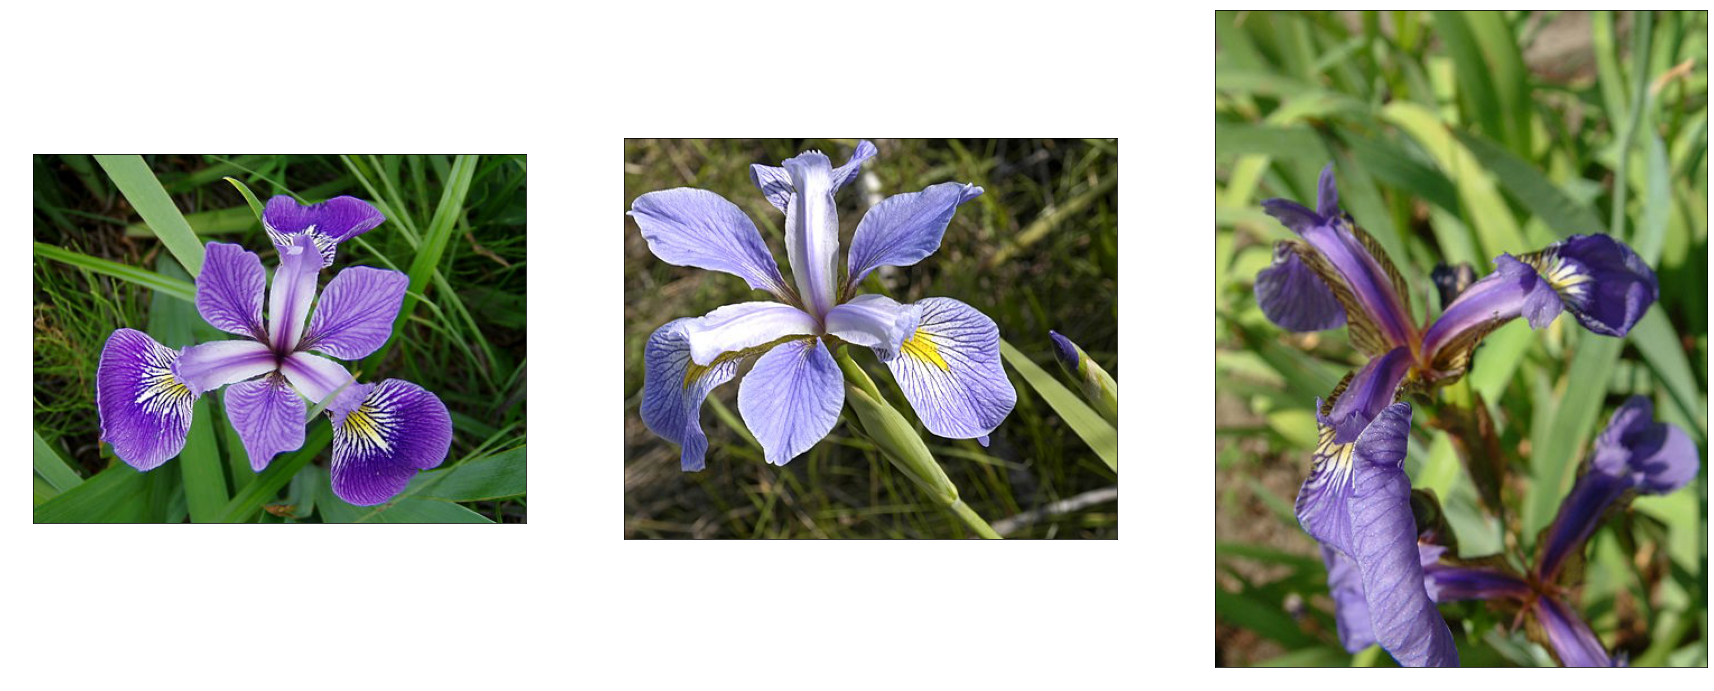

In [161]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('1.jpg')
img2 = mpimg.imread('2.jpg')
img3 = mpimg.imread('3.jpg')

fig, axes = plt.subplots(1, 3, figsize=(30, 30))
imgplot = axes[0].imshow(img1)
imgplot = axes[1].imshow(img2)
imgplot = axes[2].imshow(img3)

In [45]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# длина чашелистика, ширина чашелистика
x = pd.DataFrame(
    iris.data[:, :2],
    columns=["длина чашелистика", "ширина чашелистика"]) 
y = pd.Series(iris.target, name="Тип")

In [46]:
x

,длина чашелистика,ширина чашелистика
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Тип, Length: 150, dtype: int64

In [166]:
y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Тип, Length: 150, dtype: object

Типы признаков:
- бинарный признак (1 и 0);
- номинальный признак (категории);
- порядковый признак (шкала);
- количественный признак.

## Задача классификации

### Решающие деревья

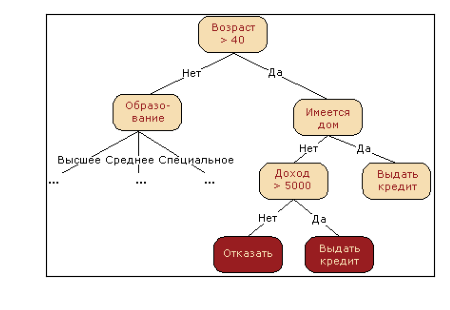

In [178]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree.gif')

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

In [48]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(x, y)

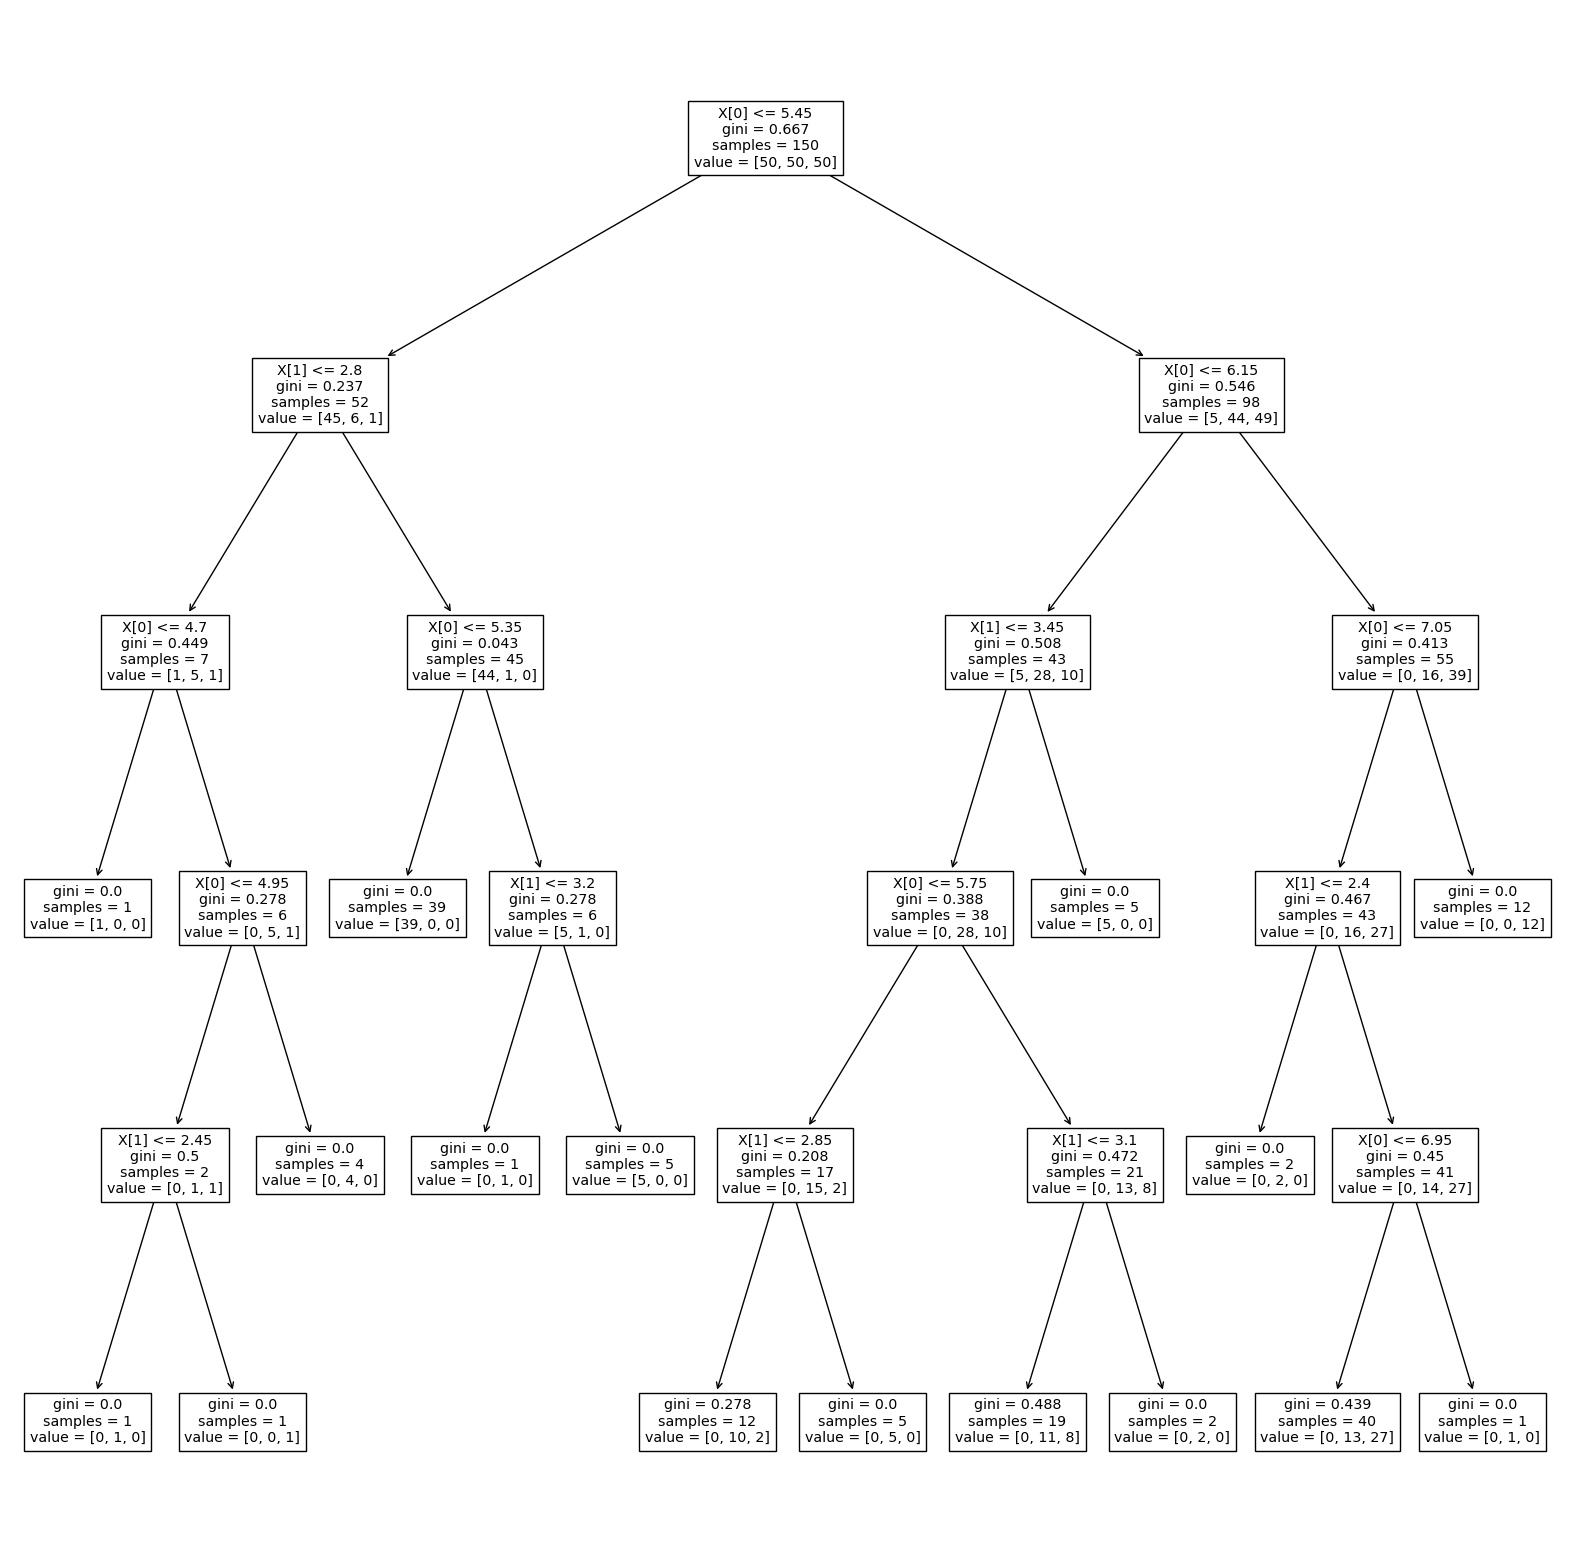

In [49]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.figure(figsize=(20, 20))
tree.plot_tree(clf)
plt.show()

Критерии качества разбиения:
- энтропия Шеннона ($S_k = -\sum^N_{i=1}p_i log_2 p_i$, где k - номер группы разбиения);
- неопределенность Джини ($G = 1 - \sum_k(p_k)^2$);
- ошибка классификации ($E = 1 - max_k p_k$).

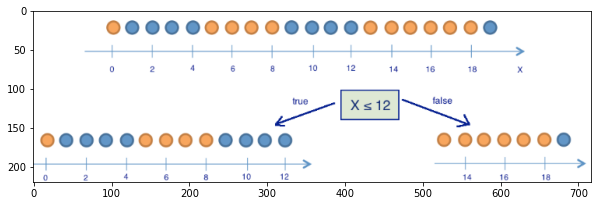

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

Прирост информации (уменьшение энтропии):
$$
IG(Q) = S_0 - \sum_{i=1}^q \frac{N_i}{N} S_i
$$

Популярные гиперпараметры:
- max_depth - глубина дерева;
- min_samples_leaf – минимальное число образцов в листах;
- criterion - критерии качества разбиения.

### Оценка качества модели

- отложенная выборка (как правило от 20% до 40%);
- кросс-валидация.

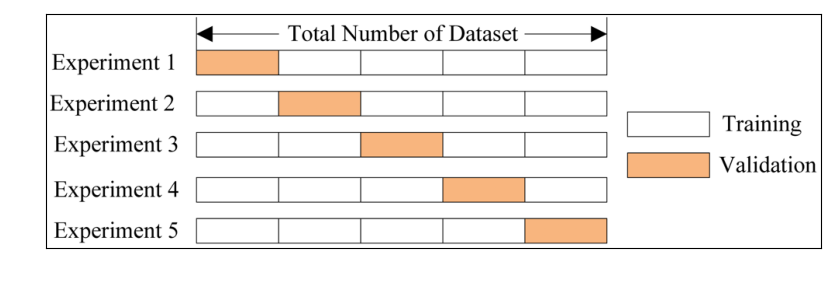

In [184]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cv.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

### Оценка бинарной классификации

Метрики в задачах классификации:
- accuracy;
- precision;
- recall;
- f1-мера.

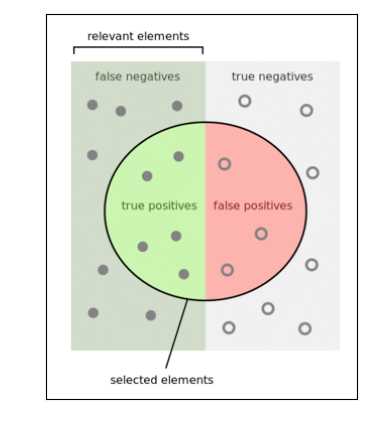

In [182]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('types.png')

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

Accuracy:
$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Precision:
$$
precision = \frac{TP}{TP + FP}
$$

Recall:
$$
recall = \frac{TP}{TP + FN}

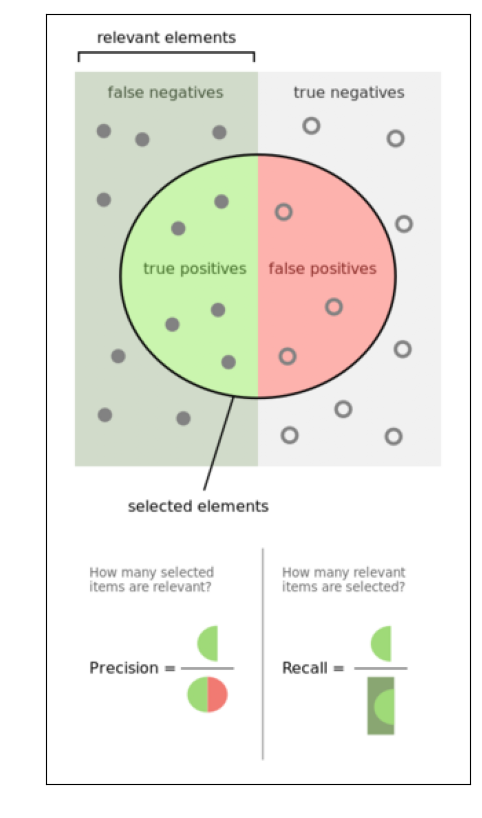

In [180]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('metrics.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

F-мера:
$$
F_\beta = (1 + \beta^2) \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
$$

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33,
    random_state=42)

iris_data = X_train, X_test, y_train, y_test

In [51]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

In [52]:
# accuracy
clf.score(X_test, y_test)

0.76

In [53]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1_score(y_pred, y_test, average="weighted")

0.756936936936937

In [54]:
f1_score(y_pred, y_test, average="macro")

0.7465465465465465

In [55]:
f1_score(y_pred, y_test, average="micro")

0.76

In [35]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_pred, y_test, average="weighted")

0.7548026315789474

In [36]:
from sklearn.metrics import precision_score, recall_score

recall_score(y_pred, y_test, average="weighted")

0.76

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': list(range(1, 10)),
    'criterion': ["gini", "entropy"],
    'min_samples_leaf': [1, 2, 3, 4]}
clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, cv=5)
clf = clf.fit(X_train, y_train)

In [38]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}

In [39]:
clf.best_score_

0.78

In [40]:
best_model = clf.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4)

### Переобучение и недообучение

Методы борьбы с переобучением (модель хорошо объясняет примеры из обучающей выборки, но относительно плохо работает на примерах, не участвовавших в обучении):
- увеличить кол-во данных;
- добавление регуляризации или увеличение коэффициента регуляризации;
- упрощение модели (например, уменьшение глубины дерева).

Методы борьбы с недообучением:
- усложнение модели (увеличение глубины дерева).

In [56]:
clf = tree.DecisionTreeClassifier(
    max_depth=4, criterion="gini", min_samples_leaf=1)

clf = clf.fit(X_train, y_train)

In [57]:
clf.score(X_train, y_train)

0.84

In [58]:
clf.score(X_test, y_test)

0.76

### Логистическая регрессия

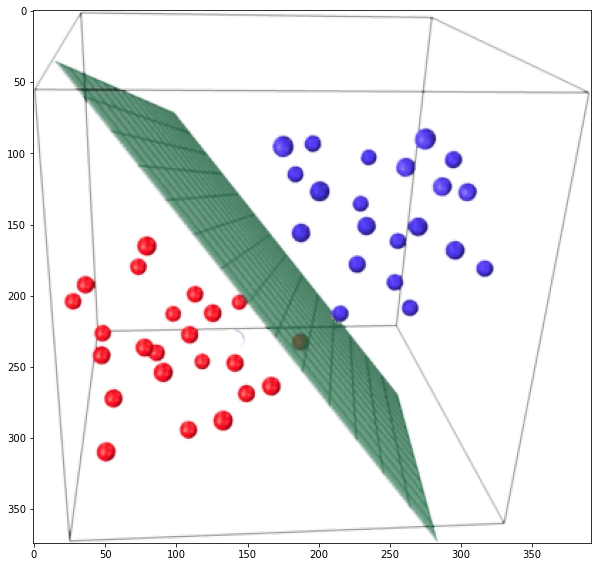

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('linear.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

Предсказание:
$$
a(x, w) = sign(\sum_{j=1}^n w_j x_j - w_0)
$$

$$
\sum_{j=1}^n w_j x_j - w_0 = w_1 x_1 + w_2 x_2 + ... + w_n x_n - w_0
$$

Функция потерь:
$$
Q(w) = \sum\limits^m_{i=1} ln (1 + exp(-y_i <x_i, w>)) \rightarrow \min\limits_{w}
$$

In [62]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

X_train, X_test, y_train, y_test = iris_data
clf = LogisticRegression(solver="newton-cg", random_state=42).fit(X_train, y_train)

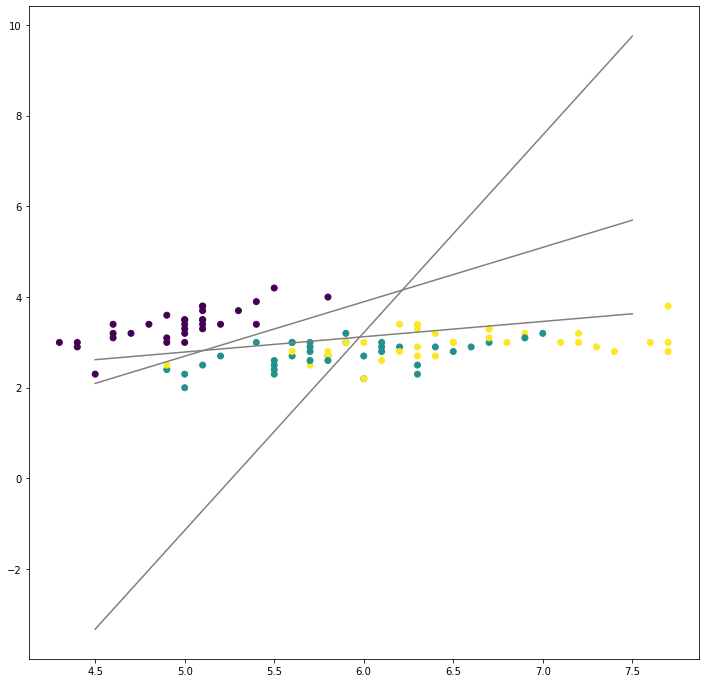

In [103]:
fig = plt.figure(figsize=(12, 12))


def lin_log(w, b):
    def func(x):
        return (0.5 - w[0] * x - b) / w[1]
    return func

def plot_lines(clf):
    for w, b in zip(clf.coef_, clf.intercept_):
        linear = lin_log(w, b)
        grid_x = np.linspace(4.5, 7.5, 200)
        grid_y = linear(grid_x)
        plt.plot(grid_x, grid_y, color="gray")

# https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
plt.scatter(X_train.to_numpy()[:, 0], X_train.to_numpy()[:, 1], c=y_train)
plot_lines(clf)
plt.show()

In [104]:
clf.predict(X_train)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2])

In [105]:
clf.predict_proba(X_train)

array([[1.30766672e-01, 5.64951208e-01, 3.04282120e-01],
       [1.47682342e-04, 1.15550828e-01, 8.84301489e-01],
       [2.24657698e-01, 5.07401523e-01, 2.67940779e-01],
       [8.84659293e-01, 7.80170395e-02, 3.73236671e-02],
       [5.87425527e-05, 1.25540375e-01, 8.74400882e-01],
       [5.38068854e-02, 6.34947529e-01, 3.11245586e-01],
       [7.99356531e-01, 1.34845779e-01, 6.57976891e-02],
       [9.14591387e-01, 6.02087801e-02, 2.51998327e-02],
       [9.51759145e-01, 2.88291847e-02, 1.94116706e-02],
       [6.32317295e-02, 8.70779863e-01, 6.59884078e-02],
       [9.94019663e-03, 5.06055870e-01, 4.84003933e-01],
       [9.36895946e-01, 4.90755735e-02, 1.40284800e-02],
       [6.74161375e-01, 2.63457229e-01, 6.23813969e-02],
       [8.01085182e-01, 1.44044783e-01, 5.48700346e-02],
       [9.95741577e-02, 6.54764647e-01, 2.45661195e-01],
       [8.47685436e-01, 1.06745813e-01, 4.55687506e-02],
       [1.70886815e-01, 5.17034734e-01, 3.12078451e-01],
       [7.23865881e-04, 4.38997

In [59]:
clf.score(X_train, y_train)

0.84

In [60]:
clf.score(X_test, y_test)

0.76

### Линейная регрессия

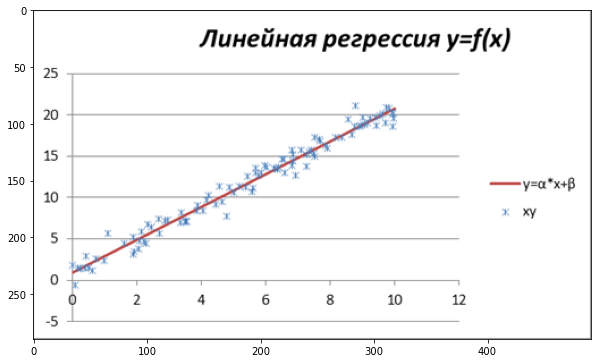

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

img = mpimg.imread('reg.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

$$
a(x, w) = \sum_{j=1}^n w_j x_j - w_0
$$

Функция потерь (MSE):
$$
MSE = \frac{1}{n} \sum\limits_{i=1}^n (Y_i - \hat{Y_i})^2
$$

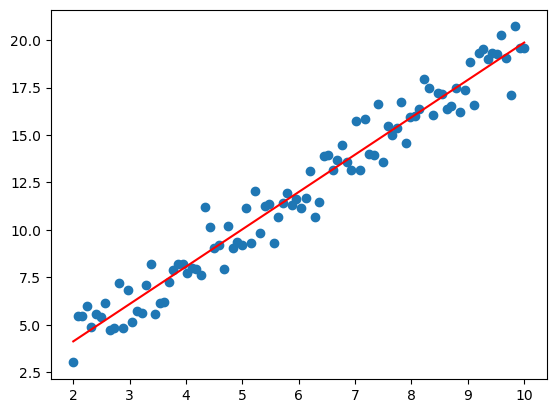

In [62]:
from sklearn.linear_model import LinearRegression

def linear(n=100):
    x = np.linspace(2, 10, n)
    y = 2 * x + np.random.normal(size=n)
    return x.reshape(n, -1), y

model = LinearRegression()

x, y = linear()
model.fit(x, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
plt.show()

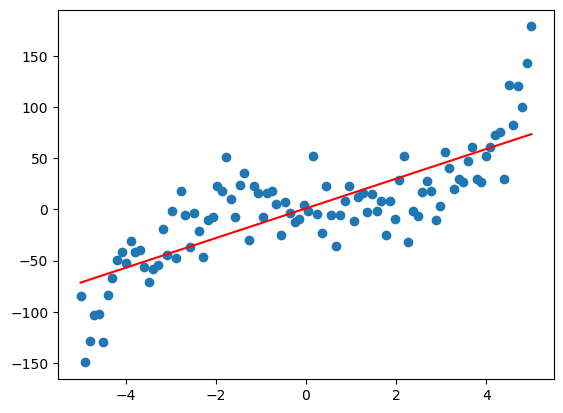

In [64]:
from sklearn.preprocessing import PolynomialFeatures

def get_square(n=100):
    x = np.linspace(-5, 5, n)
    y = x ** 3 + np.random.normal(size=n, scale=20)
    return x.reshape(n, -1), y.reshape(y.shape[0], -1)

model = LinearRegression()

x, y = get_square()


model.fit(x, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x), color="red")
plt.show()

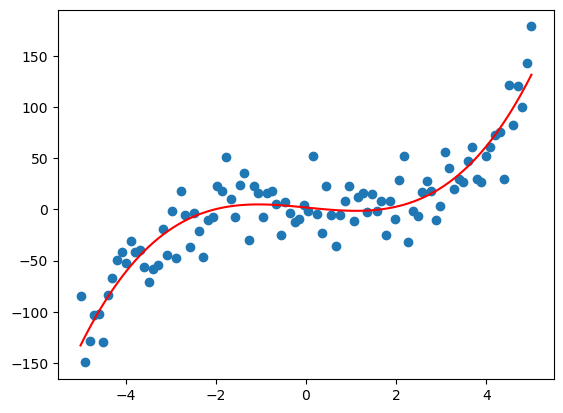

In [65]:
model = LinearRegression()

poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(x)
predict_ = poly.fit_transform(y)
model.fit(X_, y)

plt.scatter(x, y)
plt.plot(x, model.predict(X_), color="red")
plt.show()

In [66]:
model = LinearRegression()

poly = PolynomialFeatures(degree=16)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(y)
model.fit(X_, y)

plt.scatter(x, y)
plt.plot(x, model.predict(X_), color="red")
plt.show()

NameError: name 'X' is not defined

### Оценка регрессии

- $R^2$ ([формула](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination));
- RMSE ($\sqrt{\frac{1}{n} \sum\limits_{i=1}^n (Y_i - \hat{Y_i})^2}$);
- MSE ($\frac{1}{n} \sum\limits_{i=1}^n (Y_i - \hat{Y_i})^2$).

In [63]:
model = LinearRegression()

poly = PolynomialFeatures(degree=22)
X_ = poly.fit_transform(x)
predict_ = poly.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_, y)

model.fit(X_train, y_train)
model.score(X_train, y_train)

NameError: name 'PolynomialFeatures' is not defined

In [186]:
model.score(X_test, y_test)

-0.060655770844548096

In [187]:
from sklearn.metrics import mean_squared_error

mean_squared_error(model.predict(X_train), y_train, squared=False)

28.68818247288358

In [188]:
mean_squared_error(model.predict(X_test), y_test, squared=False)

36.90871631915659

### Решающее дерево для регрессии

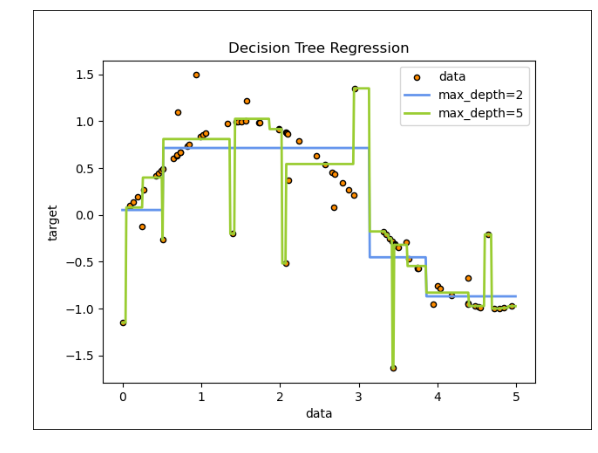

In [222]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree_reg.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

Критерий качества:
$$
D = \frac{1}{l} \sum\limits^{l}_{i=1} (y_i - \frac{1}{l} \sum\limits^{l}_{i=1} y_i)^2
$$

In [67]:
df

,Year,mark,Mileage,Model,Price,Maximum_power,Volume,Engine_volume
0,2020.0,Mercedes-Benz,0.0,G-Class,12902800.0,249.0,2.9,2925.0
1,2020.0,Mercedes-Benz,0.0,G-Class,15709500.0,330.0,2.9,2925.0
2,2019.0,Mercedes-Benz,15500.0,G-Class,13890000.0,422.0,4.0,3982.0
3,2020.0,Mercedes-Benz,0.0,G-Class,13116000.0,422.0,4.0,3982.0
4,2019.0,Mercedes-Benz,15297.0,G-Class,11450000.0,422.0,4.0,3982.0
...,...,...,...,...,...,...,...,...
36659,2008.0,Chrysler,230000.0,Sebring,345000.0,189.0,2.7,2736.0
36660,2008.0,Chrysler,180000.0,Sebring,300000.0,172.0,2.4,2360.0
36661,2008.0,Chrysler,141000.0,Sebring,330000.0,189.0,2.7,2736.0
36662,2007.0,Chrysler,222000.0,Sebring,654000.0,172.0,2.4,2360.0


In [68]:
pd.get_dummies(df["mark"])

,AC,AMC,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Cadillac,Changan,...,Suzuki,TagAZ,Tesla,Toyota,Volkswagen,Volvo,Vortex,YAZ,ZAZ,ZX
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# df = df.dropna()
df = df.join(pd.get_dummies(df["mark"])).drop(columns="mark")
df = df.join(pd.get_dummies(df["Model"])).drop(columns="Model")

In [70]:
df.head()

,Year,Mileage,Price,Maximum_power,Volume,Engine_volume,AC,AMC,Acura,Alfa Romeo,...,Zest,i20,i3,i30,i40,i8,ix35,mi-DO,on-DO,tC
0,2020.0,0.0,12902800.0,249.0,2.9,2925.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020.0,0.0,15709500.0,330.0,2.9,2925.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019.0,15500.0,13890000.0,422.0,4.0,3982.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,0.0,13116000.0,422.0,4.0,3982.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019.0,15297.0,11450000.0,422.0,4.0,3982.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.isnull().any().any()

False

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = df.drop(columns=['Price', "Engine_volume"])
y_true = df["Price"]
model.fit(x, y_true)

LinearRegression()

In [221]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, model.predict(x), squared=False)

1387073.1814654907

In [226]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(x, y_true)
mean_squared_error(y_true, tree.predict(x), squared=False)

1947081.4879153022

In [227]:
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(x, y_true)
mean_squared_error(y_true, tree.predict(x), squared=False)

638969.8954174338

In [229]:
parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
tree = DecisionTreeRegressor()
clf = GridSearchCV(tree, parameters)
clf.fit(x, y_true)
mean_squared_error(y_true, clf.best_estimator_.predict(x), squared=False)

576309.0488424957

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size=0.2, random_state=42)

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
tree = DecisionTreeRegressor()
clf = GridSearchCV(tree, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [232]:
mean_squared_error(y_train, clf.best_estimator_.predict(x_train), squared=False)

466602.46555200464

In [233]:
mean_squared_error(y_test, clf.best_estimator_.predict(x_test), squared=False)

696072.0395478474

In [234]:
clf.best_params_

{'max_depth': 10}

In [235]:
clf.best_score_

0.7787968043776367

Вопросы для экзамена:
- План EDA и примеры.
- Переобучение и недообучение.
- Отложенная выборка и кросс-валидация. Оценка классификации и регрессии.
- Решающие деревья, линейная регрессия, логистическая регрессия.

Вопросы для самоизучения:
- Ансамбли.
- Бэггинг. Случайный лес для [классификации](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и [регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- Бустинг.
- Метод ближайших соседей (knn)
- Функции потерь: MAE, Huber Loss
- Алгоритмы построения решающих деревьев
- Регуляризация([Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) и [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html))

https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html